# Identificação de espécies de insetos
## Um projeto de Machine Learning dedicado a identificar espécies de insetos baseado em suas imagens


# Importando Bibliotecas

In [15]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import os
from PIL import Image
import random
from torchvision import transforms
import torch

Extração de banco de dados

In [6]:
# Caminho base do dataset
base_dir = ("C:/Users/ovinn/Documents/Projetos/Tabelas/pest")

# Diretórios de treino e teste
train_dir = os.path.join(base_dir, "train")
test_dir = os.path.join(base_dir, "test")

Análise exploratória

In [7]:
# Listar as classes (espécies de insetos)
classes_train = os.listdir(train_dir)
classes_test = os.listdir(test_dir)

# Contar imagens por espécie
def contar_imagens(pasta_base):
    contagem = {}
    for classe in os.listdir(pasta_base):
        caminho_classe = os.path.join(pasta_base, classe)
        if os.path.isdir(caminho_classe):  # Garante que é uma pasta
            contagem[classe] = len(os.listdir(caminho_classe))
    return contagem

contagem_train = contar_imagens(train_dir)
contagem_test = contar_imagens(test_dir)

print("Classes no conjunto de treino:", classes_train)
print("Número de imagens por classe (treino):", contagem_train)
print("\nClasses no conjunto de teste:", classes_test)
print("Número de imagens por classe (teste):", contagem_test)


Classes no conjunto de treino: ['aphids', 'armyworm', 'beetle', 'bollworm', 'grasshopper', 'mites', 'mosquito', 'sawfly', 'stem_borer']
Número de imagens por classe (treino): {'aphids': 266, 'armyworm': 223, 'beetle': 291, 'bollworm': 245, 'grasshopper': 277, 'mites': 254, 'mosquito': 295, 'sawfly': 200, 'stem_borer': 181}

Classes no conjunto de teste: ['aphids', 'armyworm', 'beetle', 'bollworm', 'grasshopper', 'mites', 'mosquito', 'sawfly', 'stem_borer']
Número de imagens por classe (teste): {'aphids': 44, 'armyworm': 43, 'beetle': 50, 'bollworm': 36, 'grasshopper': 46, 'mites': 42, 'mosquito': 50, 'sawfly': 37, 'stem_borer': 36}


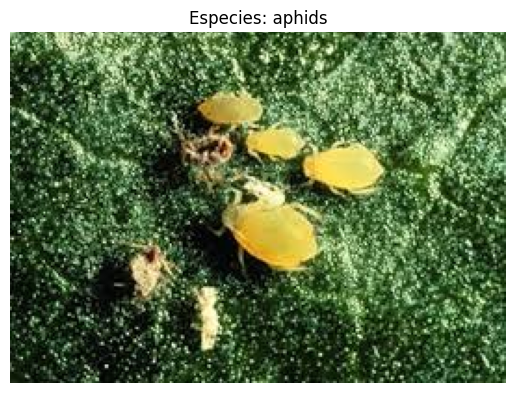

In [8]:
# Escolher um conjunto (train ou test)
conjunto = "train"  # Ou "test"

# Listar as espécies dentro do conjunto escolhido
caminho_conjunto = os.path.join(base_dir, conjunto)
especies = os.listdir(caminho_conjunto)

# Escolher uma espécie aleatória
especie_escolhida = random.choice(especies)

# Listar imagens dentro da pasta da espécie escolhida
caminho_especie = os.path.join(caminho_conjunto, especie_escolhida)
imagens_especie = os.listdir(caminho_especie)

# Escolher uma imagem aleatória dessa espécie
img_escolhida = random.choice(imagens_especie)

# Abrir e exibir a imagem
img_path = os.path.join(caminho_especie, img_escolhida)
img = Image.open(img_path)

plt.imshow(img)
plt.axis("off")
plt.title(f"Especies: {especie_escolhida}")
plt.show()



Criando o DataFrame

In [17]:
df_especies = pd.DataFrame({
    "Especie": list(contagem_train.keys()),
    "Treino": list(contagem_train.values()),
    "Teste": [contagem_test.get(especie, 0) for especie in contagem_train.keys()]
})

Distribuição de dados

<Figure size 1200x600 with 0 Axes>

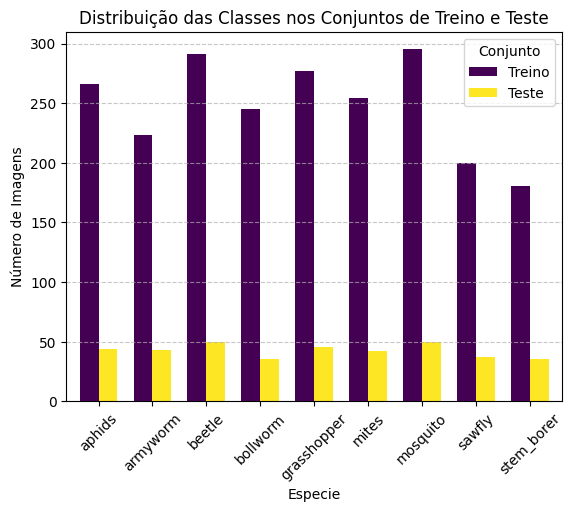

In [18]:
plt.figure(figsize=(12, 6))
df_especies.set_index("Especie").plot(kind="bar", stacked=False, colormap="viridis", width=0.7)

plt.title("Distribuição das Classes nos Conjuntos de Treino e Teste")
plt.xlabel("Especie")
plt.ylabel("Número de Imagens")
plt.xticks(rotation=45)
plt.legend(title="Conjunto")
plt.grid(axis="y", linestyle="--", alpha=0.7)

Padronização de imagens

In [19]:
# Transformação da média para 0 e desvio padrão para 1 para melhor aprendizado do modelo.
transformacao = transforms.Compose([
    transforms.Resize((128, 128)),  
    transforms.ToTensor(),  
    transforms.Normalize(mean=[0.5, 0.5, 0.5], std=[0.5, 0.5, 0.5])
])

In [20]:
dataset_treino = []
labels = []

# Percorrer as pastas das espécies
for especie in os.listdir(train_dir):
    caminho_especie = os.path.join(train_dir, especie)
    
    if os.path.isdir(caminho_especie):  # Garante que seja uma pasta
        for img_nome in os.listdir(caminho_especie):
            img_caminho = os.path.join(caminho_especie, img_nome)

            try:
                # Abrir a imagem
                img = Image.open(img_caminho).convert("RGB")  

                # Aplicar transformação
                img_t = transformacao(img)

                # Adicionar ao dataset
                dataset_treino.append(img_t)
                labels.append(especie)  # Guardar o rótulo da espécie

            except Exception as e:
                print(f"Erro ao carregar {img_caminho}: {e}")

In [21]:
dataset_treino = torch.stack(dataset_treino)

print(f"Total de imagens processadas: {len(dataset_treino)}")
print(f"Formato das imagens tensorizadas: {dataset_treino.shape}")  # (Quantidade, Canais, Altura, Largura)

Total de imagens processadas: 2232
Formato das imagens tensorizadas: torch.Size([2232, 3, 128, 128])
